# Low-rank Tensor Regression

Tensor regression is available in the module `tensorly.regression`.

Given a series of $N$ tensor samples/observations, $\tilde X_i, i={1, \cdots, N}$, and corresponding labels $y_i, i={1, \cdots, N}$, we want to find the weight tensor $\tilde W$ such that, for each $i={1, \cdots, N}$:

$$
   y_i = \langle \tilde X_i, \tilde W \rangle
$$

We additionally impose that $\tilde W$ be a rank-r CP decomposition (Kruskal regression) or a rank $(r_1, \cdots, r_N)$-Tucker decomposition (Tucker regression).

TensorLy implements both types of tensor regression as scikit-learn-like estimators.

For instance, Krusal regression is available through the $tensorly.regression.KruskalRegression$ object. This implements a fit method that takes as parameters $X$, the data tensor which first dimension is the number of samples, and $y$, the corresponding vector of labels.

Given a set of testing samples, you can use the predict method to obtain the corresponding predictions from the model.



In [1]:
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.random import check_random_state
from tensorly.regression.kruskal_regression import KruskalRegressor
import tensorly.backend as T

import matplotlib.pyplot as plt
#show figures in the notebook
%matplotlib inline

Using numpy backend.


In [2]:
# Parameter of the experiment
image_height = 25
image_width = 25

# fix the random seed for reproducibility
rng = check_random_state(1) 

# Generate a random tensor
X = T.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))

Generate the original image

In [3]:
weight_img = gen_image(region='swiss', image_height=image_height, image_width=image_width)
weight_img = T.tensor(weight_img)

The true labels is obtained by taking the product between the true regression weights and the input tensors

In [5]:
y = T.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

## Let's view the true regression weight 

Text(0.5,1,'True regression weights')

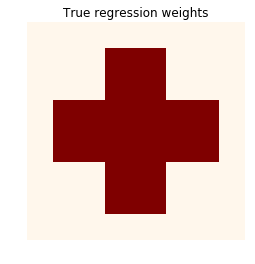

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('True regression weights')

## Tensor regression 

### Create a tensor Regressor estimator

In [40]:
estimator = KruskalRegressor(weight_rank=1, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)

### Fit the estimator to the data

In [41]:
estimator.fit(X, y)

### Predict the labels given input tensors

In [42]:
y_pred = estimator.predict(X)

Let's measure the RMSE

In [43]:
from tensorly.metrics import RMSE

In [44]:
RMSE(y, y_pred)

6.209524216534728

### Visualise the learned weights

Text(0.5,1,'Learned regression weights')

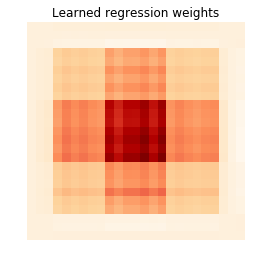

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(estimator.weight_tensor_), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('Learned regression weights')

Wait! Weren't the learned weights supposed to be a low rank tensor in the Krusakl form!?

They are! We simply plot the full tensor corresponding to the learned decomposition. You can access the decomposed form as follows:

In [46]:
factors = estimator.kruskal_weight_

In [47]:
[f.shape for f in factors]

[(25, 1), (25, 1)]

# Tucker regression

In [48]:
from tensorly.regression import TuckerRegressor

In [52]:
estimator = TuckerRegressor(weight_ranks=[10, 5])

In [53]:
estimator.fit(X, y)


Converged in 8 iterations


In [54]:
y_pred = estimator.predict(X)

In [55]:
RMSE(y, y_pred)

0.0037852639020583777

Text(0.5,1,'Learned regression weights')

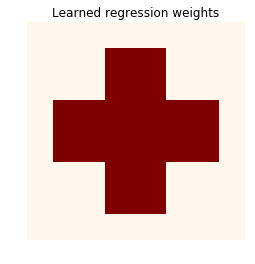

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(estimator.weight_tensor_), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('Learned regression weights')

In [57]:
core, factors = estimator.tucker_weight_

In [58]:
core.shape

(10, 5)

In [59]:
[f.shape for f in factors]

[(25, 10), (25, 5)]